<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 2 to 575
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             478 non-null    object 
 1   year               478 non-null    int64  
 2   income_per_capita  478 non-null    float64
 3   real_income        478 non-null    float64
 4   nominal_wage       478 non-null    float64
 5   real_wage          478 non-null    float64
 6   region_standard    478 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 29.9+ KB
None

Пропуски по колонкам:
 region               0
year                 0
income_per_capita    0
real_income          0
nominal_wage         0
real_wage            0
region_standard      0
dtype: int64

Уникальных регионов: 80
Уникальных лет: 6

Статистика по доходам и зарплатам:
        income_per_capita  real_income   nominal_wage   real_wage
count         478.000000   478.000000     478.000000  478.

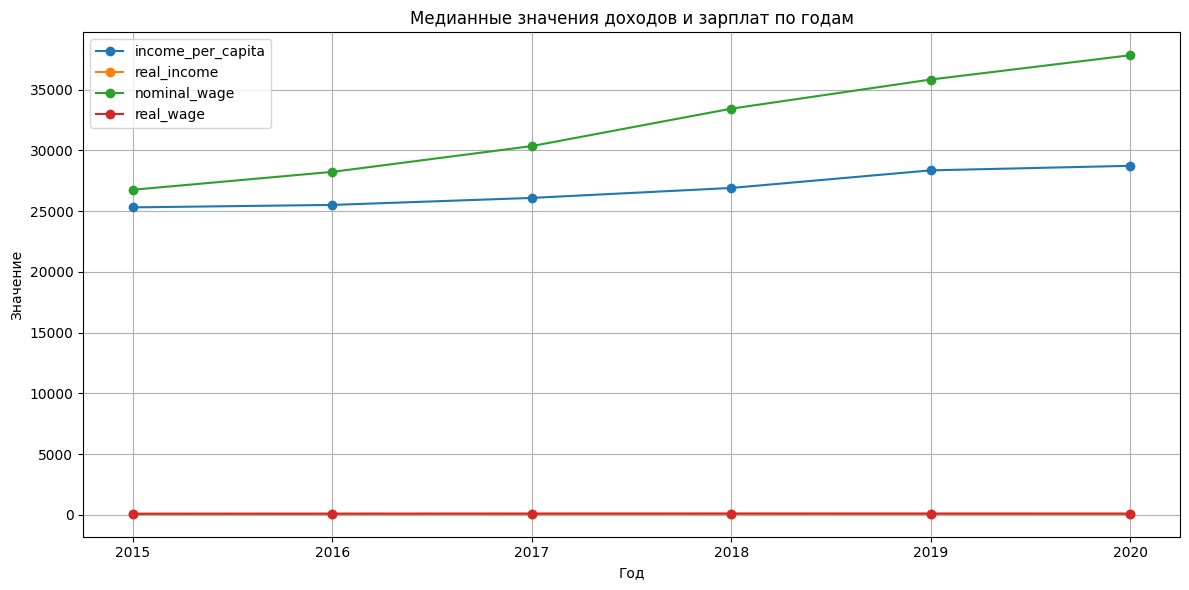

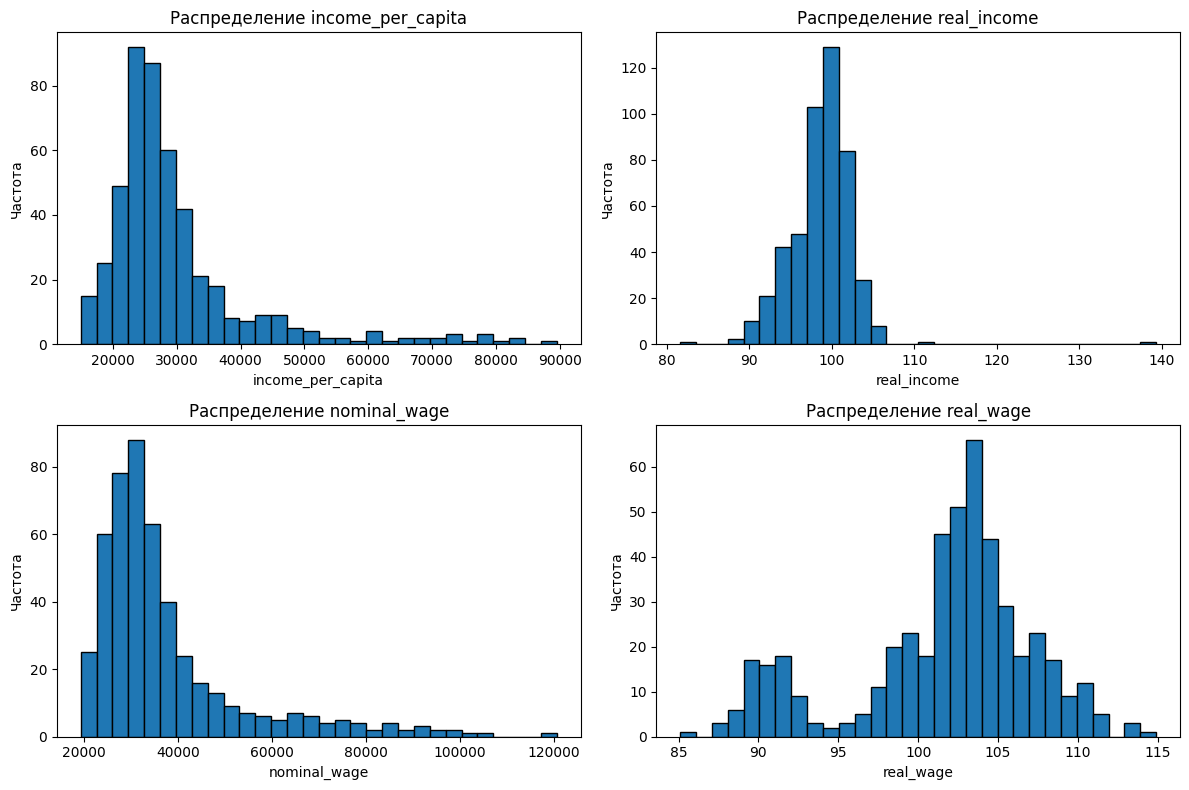

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/real_income_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Приводим real_wage к float
df["real_wage"] = pd.to_numeric(df["real_wage"], errors="coerce")

# 4. Удаляем строки с пропусками в основных колонках
df = df.dropna(subset=["real_income", "income_per_capita", "nominal_wage", "real_wage"])

# 5. Проверка типов и пропусков
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 6. Уникальные регионы и годы
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["year"].nunique())

# 7. Статистика по доходам и зарплатам
print("\nСтатистика по доходам и зарплатам:\n", df[["income_per_capita", "real_income", "nominal_wage", "real_wage"]].describe())

# 8. Проверка дубликатов
duplicates = df.duplicated().sum()
print("\nКоличество дубликатов:", duplicates)

# 9. Топ-5 по максимальному real_income
top5 = df.sort_values(by="real_income", ascending=False).head(5)
print("\nТоп-5 по real_income:\n", top5[["region_standard", "year", "real_income"]])

# 10. Медианные значения по годам
median_all = df.groupby("year")[["income_per_capita", "real_income", "nominal_wage", "real_wage"]].median()

# 11. График медианных значений
plt.figure(figsize=(12,6))
for col in median_all.columns:
    plt.plot(median_all.index, median_all[col], marker="o", label=col)
plt.title("Медианные значения доходов и зарплат по годам")
plt.xlabel("Год")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. Гистограммы по каждому показателю
plt.figure(figsize=(12,8))
for i, col in enumerate(median_all.columns):
    plt.subplot(2,2,i+1)
    plt.hist(df[col], bins=30, edgecolor="black")
    plt.title(f"Распределение {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `real_income_standardized.csv`

**Описание данных**
- 478 записей по 80 регионам.
- Период наблюдений: 2015–2020.
- Показатели: доходы и зарплаты населения.

---

**Типы данных**
- Все признаки корректны.
- `real_wage` приведён к float.

---

**Пропуски**
- Отсутствуют (удалено 2 записи с NaN).

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- **Доход на душу населения:** медиана ~26,620 руб.
- **Реальный доход:** медиана ~99.1%.
- **Номинальная зарплата:** медиана ~32,283 руб.
- **Реальная зарплата:** медиана ~102.8%.

---

**Тренды**
- Все показатели стабильны, с умеренным ростом номинальных значений.
- Реальный доход и реальная зарплата держатся в диапазоне ~95–105%.

---

**Топ-5 регионов по реальному доходу**
1. Севастополь (139.3%)
2. Республика Тыва (110.9%)
3. Республика Крым (106.4%)
4. Ненецкий АО (105.9%)
5. Республика Крым (105.9%)

---

**Вывод**
- Данные очищены от агрегатов и пропусков.
- Готовы к дальнейшему анализу и моделированию.


In [2]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/income_AfterEDA.csv", index=False)